<a href="https://colab.research.google.com/github/Kumchu-Elsen/Machine-Learning-Project-Personal-Loan-Campaign/blob/main/Kumchu_Elsen_AIML_ML_Project_full_code_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

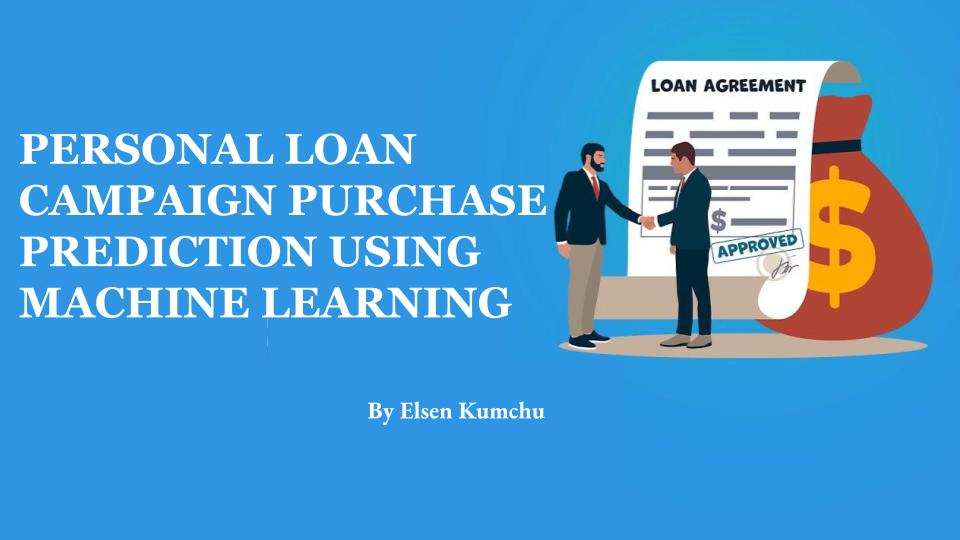

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import math

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
)

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = "/content/drive/MyDrive/AI and ML Post Graduate Program/Course 2 Machine Learning Project/Loan_Modelling.csv"
df=pd.read_csv(file_path)
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
#Copying data to avoid changes to original data
data = df.copy()

# Data Overview

* Observations
* Sanity checks

### Understand the shape of the dataset.

In [ ]:
# Write your code here
data.shape

(5000, 14)

### Check the data types of the columns for the dataset

In [ ]:
# Write your code here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


##Checking for null values

In [ ]:
# Write your code here
data.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


### Checking the Statistical Summary

In [ ]:
# Write your code here
data.describe().T
#This will give for the entire dataset

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


### Checking for duplicated Values

In [ ]:
# checking for duplicate values
data.duplicated().sum()

np.int64(0)

### Checking for Anomalous Values

In [ ]:
# checking for unique values in ID column
data["ID"].nunique()

5000

In [ ]:
data["Experience"].nunique()

47

### Observation

#### There are 47 unique values

###Observation


The experience field has abnormal values (-1, -2, -3)

### Observation

ZIPCode had 467 unique values

# Feature Engineering

In [ ]:
# checking for experience <0
data[df["Experience"] < 0]["Experience"].unique()

array([-1, -2, -3])

In [ ]:
# Correcting the experience values
data["Experience"].replace(-1, 1, inplace=True)
data["Experience"].replace(-2, 2, inplace=True)
data["Experience"].replace(-3, 3, inplace=True)

In [ ]:
data["Education"].unique()

array([1, 2, 3])

In [ ]:
# checking the number of uniques in the zip code
data["ZIPCode"].nunique()

467

In [ ]:
data["ZIPCode"] = data["ZIPCode"].astype(str)
print(
    "Number of unique values if we take first two digits of ZIPCode: ",
    data["ZIPCode"].str[0:2].nunique(),
)
data["ZIPCode"] = data["ZIPCode"].str[0:2]

data["ZIPCode"] = data["ZIPCode"].astype("category")

Number of unique values if we take first two digits of ZIPCode:  7


In [ ]:
## Converting the data type of categorical features to 'category'
cat_cols = [
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "ZIPCode",
]
data[cat_cols] = data[cat_cols].astype("category")

# Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

##Univariate Analysis

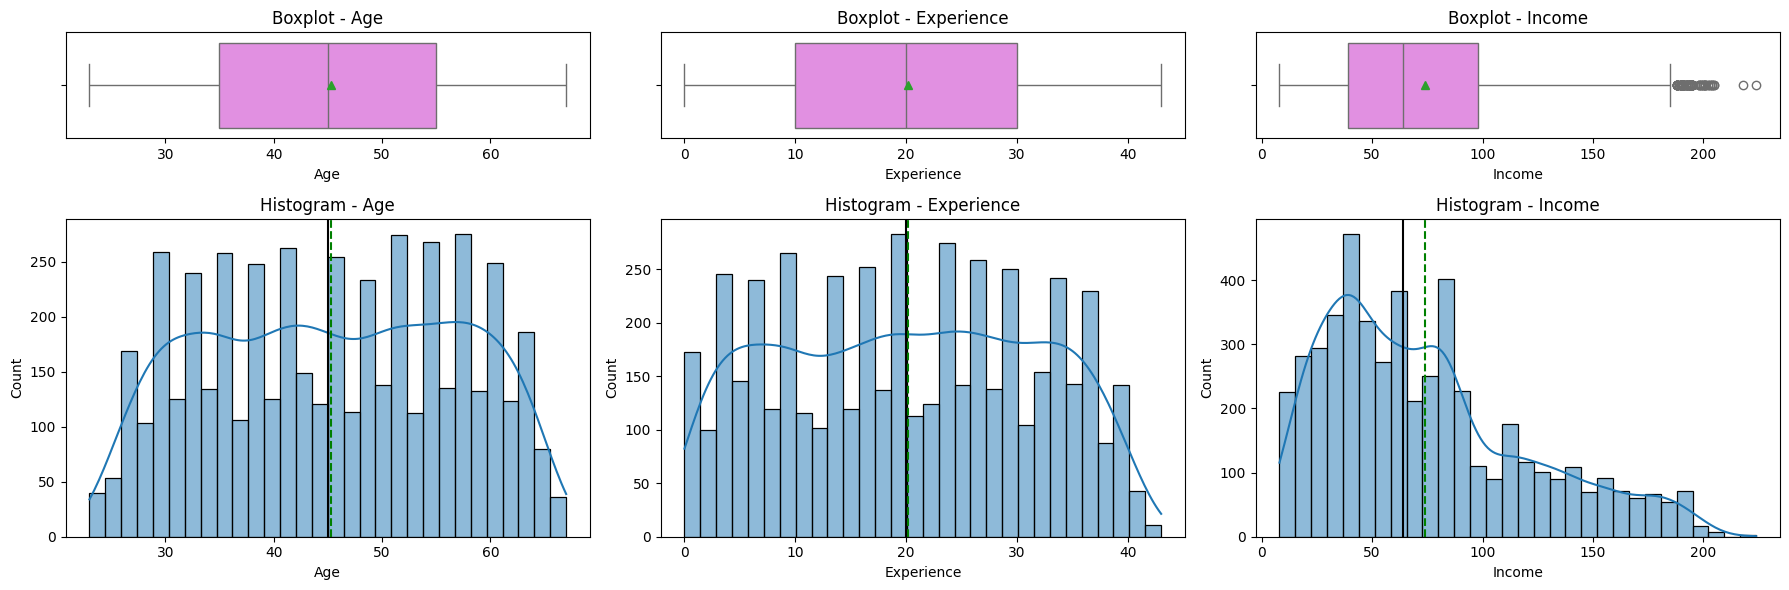

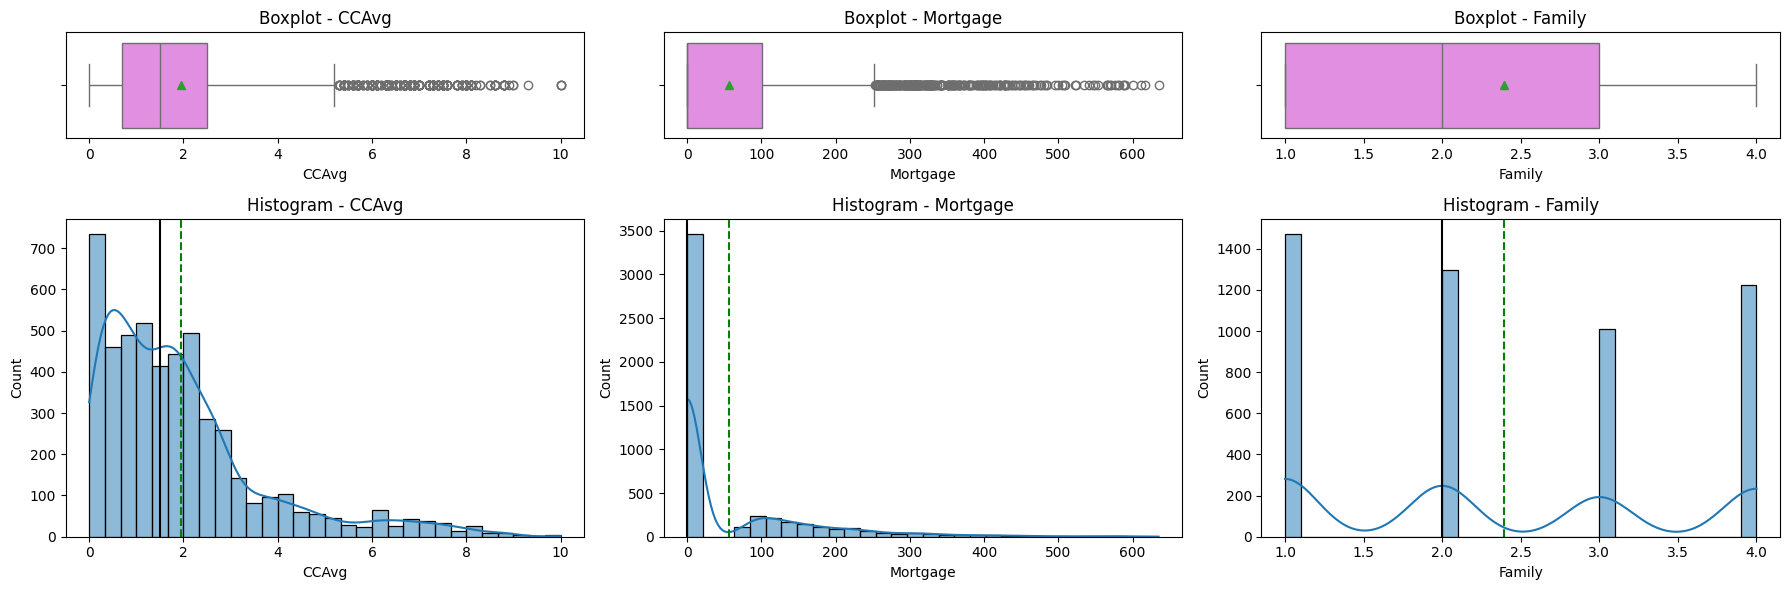

In [ ]:
# Original function for one plot
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")
    if bins:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter")
    else:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, palette="winter")
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")
    f2.suptitle(f'Distribution and Boxplot for {feature}', fontsize=14)
    plt.tight_layout()
    plt.show()

# Multi-plot layout: 3 plots per row
def histogram_boxplot_grid(data, features, kde=False, bins=None, cols=3):
    total = len(features)
    for i in range(0, total, cols):
        sub_features = features[i:i+cols]
        fig, axes = plt.subplots(2, len(sub_features), figsize=(6 * len(sub_features), 6),
                                 gridspec_kw={'height_ratios': (0.25, 0.75)}, sharex=False)

        if len(sub_features) == 1:
            axes = [[axes[0]], [axes[1]]]  # Ensure 2D

        for idx, feature in enumerate(sub_features):
            sns.boxplot(data=data, x=feature, ax=axes[0][idx], showmeans=True, color="violet")
            if bins:
                sns.histplot(data=data, x=feature, kde=kde, ax=axes[1][idx], bins=bins, palette="winter")
            else:
                sns.histplot(data=data, x=feature, kde=kde, ax=axes[1][idx], palette="winter")
            axes[1][idx].axvline(data[feature].mean(), color="green", linestyle="--")
            axes[1][idx].axvline(data[feature].median(), color="black", linestyle="-")
            axes[0][idx].set_title(f'Boxplot - {feature}')
            axes[1][idx].set_title(f'Histogram - {feature}')

        plt.tight_layout()
        plt.show()

# Example usage
num_cols = ["Age", "Experience", "Income", "CCAvg", "Mortgage","Family"]
histogram_boxplot_grid(data, features=num_cols, kde=True, bins=30, cols=3)

### Observation

50% of customers are between the age of 35 to about 55 years of age. The median age is about 45 and the average around 45.2 years of age

50% of customers have between 10 and 30 years of experience with an average experience of 20 years.

50% of customers earn between $38,000 and $98,000 per year. The median income is at $65,000 and Average is $73,000

50% of customers spend an average of $700 to $2,500 per month on credit card. They median expenditure is around $1,500 and the avaerage expenditure is about $1900.

There are outlier customers spending between $$5200 to $10,000 per month


50% of customer mortgages is between $0 to $100,000. The average mortgage is $55,000. We also have outliers with mortgages between $250,000 to $635,000

50% of customers have a family size between 1 and 3 with an average of 2.5

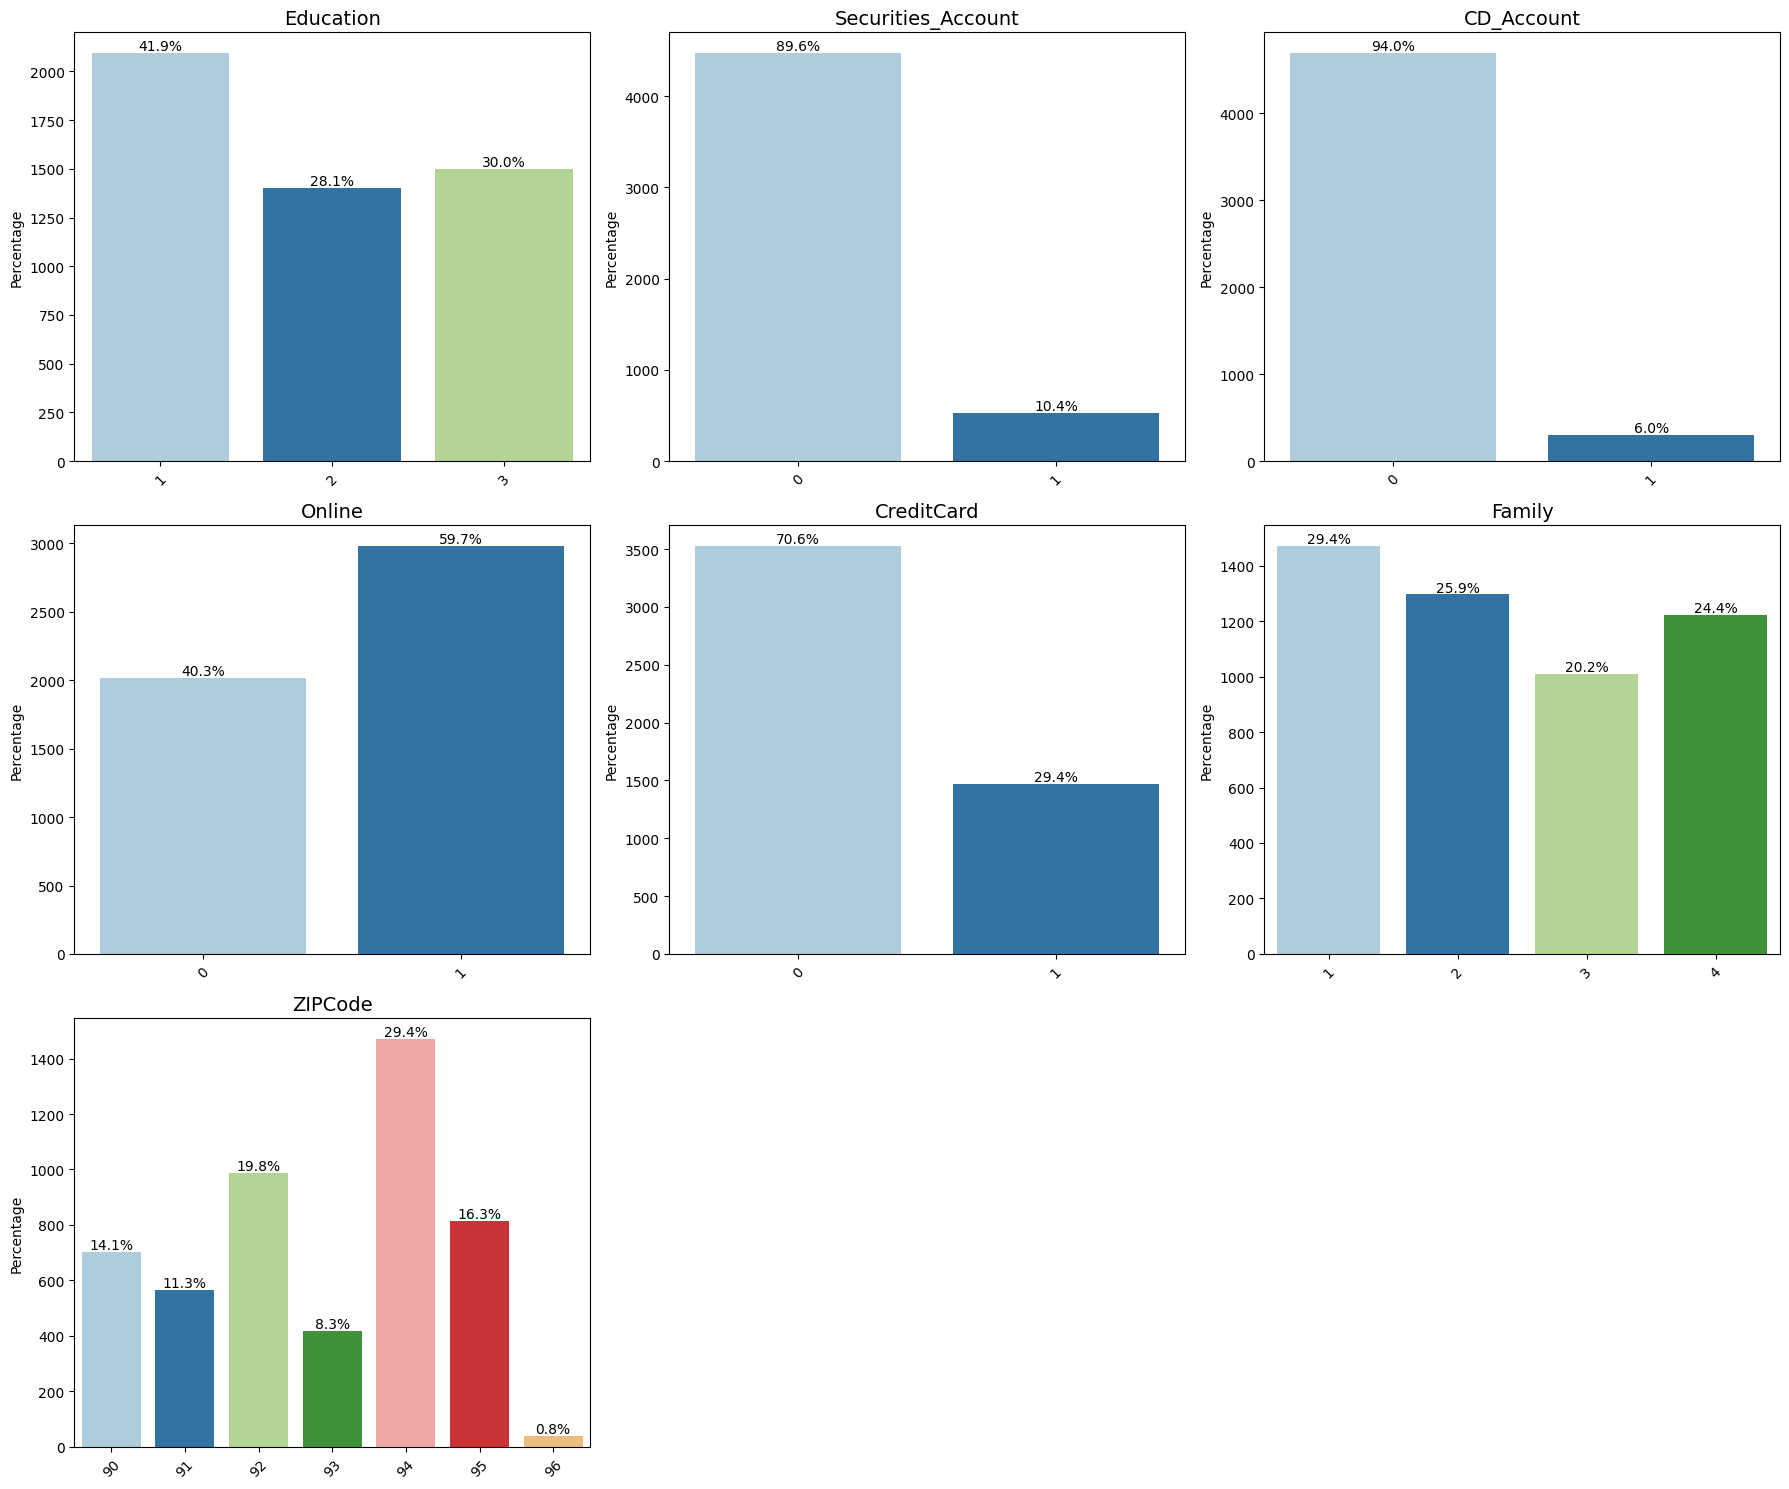

In [ ]:
import math

def labeled_barplot_grid(data, features, perc=False, n=None, cols=3):
    """
    Display multiple labeled barplots in a grid layout.

    data: DataFrame
    features: List of categorical features
    perc: If True, display percentage labels
    n: Top N categories (default: all)
    cols: Number of plots per row
    """
    total_plots = len(features)
    rows = math.ceil(total_plots / cols)
    fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 5 * rows))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        ax = axes[i]
        total = len(data[feature])
        count = data[feature].nunique()
        order_vals = data[feature].value_counts().index[:n].sort_values() if n else data[feature].value_counts().index.sort_values()

        sns.countplot(data=data, x=feature, palette="Paired", order=order_vals, ax=ax)
        ax.set_title(f'{feature}', fontsize=14)
        ax.set_xlabel("")
        ax.set_ylabel("Count" if not perc else "Percentage")
        ax.tick_params(axis='x', rotation=45)

        for p in ax.patches:
            label = "{:.1f}%".format(100 * p.get_height() / total) if perc else p.get_height()
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax.annotate(label, (x, y), ha='center', va='center', fontsize=10, xytext=(0, 5), textcoords='offset points')

    # Remove empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Usage
cat_cols = ["Education", "Securities_Account", "CD_Account", "Online", "CreditCard", "Family","ZIPCode"]
labeled_barplot_grid(data, features=cat_cols, perc=True, cols=3)

###Observation

 41.9% of customers have an undergraduate degree, 28.1% have an Advance/Professional degree and 30.0% have a Masters.

89.6% of customers do not have a Securities_Account.

59.7% of customers use online banking while 40.3% do not.

70.6% of customers have a credit Card

The Barplot indicates that the 7 unique zip codes rank from highest number of customers to lowest number of customers as follows

 29.4% of Customers have ZIPCode 94
 19.8% of Customers have ZIPCode 92
 16.3% of Customers have ZIPCode 95
 14.1% of Customers have ZIPCode 90
 11.3% of Customers have ZIPCode 91
 8.3% of Customers have ZIPCode 93
 0.8% of Customers have ZIPCode 96

## Bivariate Analysis

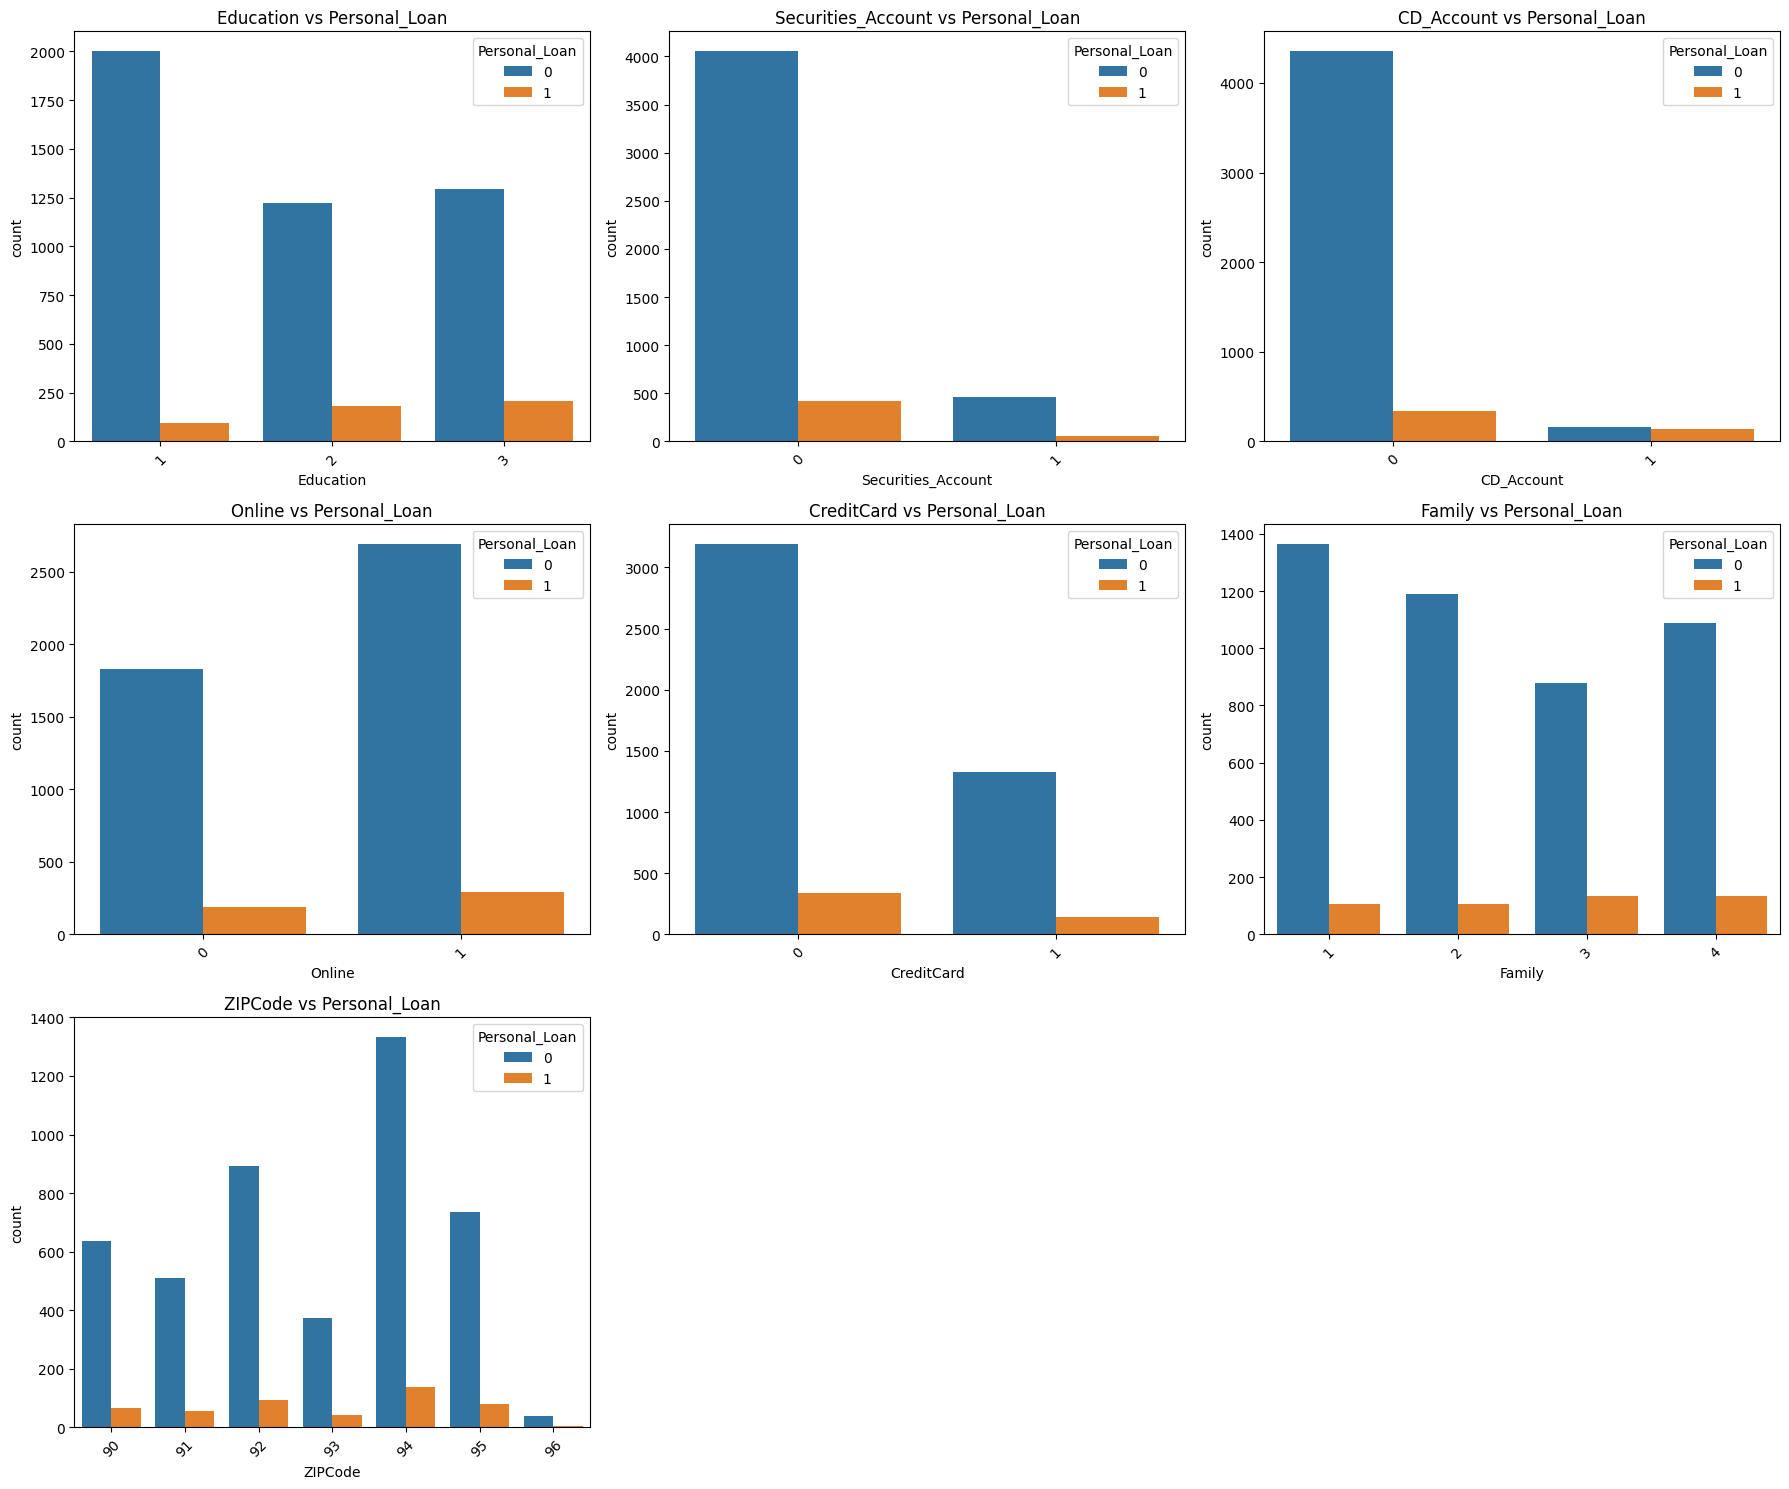

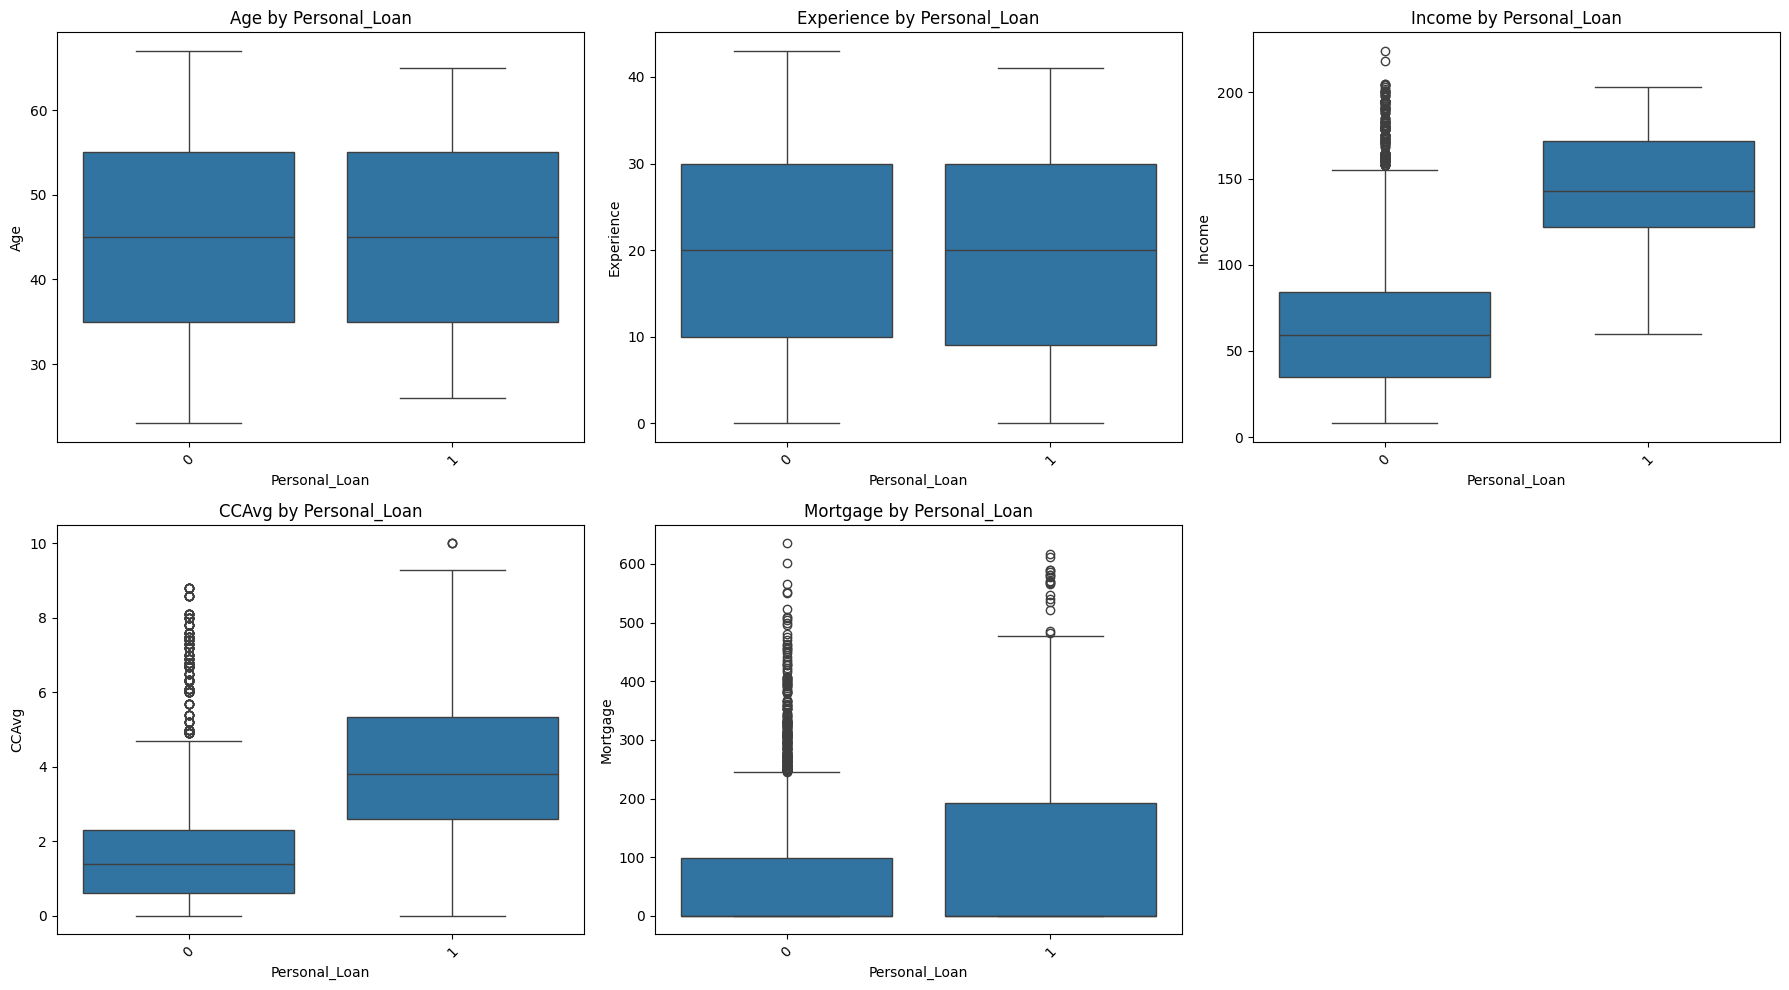

In [ ]:
target = "Personal_Loan"
cat_cols = ["Education", "Securities_Account", "CD_Account", "Online", "CreditCard", "Family","ZIPCode"]
num_cols = ["Age", "Experience", "Income", "CCAvg", "Mortgage"]

# Helper function for grid plotting
def plot_grid(data, columns, kind="cat", target="Personal_Loan", cols=3):
    total = len(columns)
    rows = math.ceil(total / cols)
    fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 5 * rows))
    axes = axes.flatten()

    for i, col in enumerate(columns):
        ax = axes[i]
        if kind == "cat":
            sns.countplot(data=data, x=col, hue=target, ax=ax)
            ax.set_title(f"{col} vs {target}")
        else:
            sns.boxplot(data=data, x=target, y=col, ax=ax)
            ax.set_title(f"{col} by {target}")
        ax.tick_params(axis='x', rotation=45)

    # Turn off unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()

# Plot 3 per row for categorical and numerical features
plot_grid(data, cat_cols, kind="cat", target=target, cols=3)
plot_grid(data, num_cols, kind="num", target=target, cols=3)

###Observations

**Personal Loan vs Education**
No Loan about 2000 Customers with undergraduate
Yes Loan about 96 Customers with undergraduate
No Loan about 1295 Customers with Advanced/Professional
Yes Loan about 205 Customers with Advanced/Professional
No Loan about 1222 Customers with Graduate degree
Yes Loan about 183 Customers with Graduate degree




**Personal Loan vs Securities Account**
Customers with Securities_Account and Personal_Loan = 60
Customers with Securities_Account and No Personal_Loan = 480
Customers with No Securities_Account and Personal_Loan = 462
Customers with No Securities_Account and No Personal_Loan = 4520





**Personal Loan vs CD_Account**
Customers with CD_Account and Personal Loan = 140
Customers with CD_Account and No Personal Loan = 162
The total number of customers with a CD_Account is 302 which is about 6%





**Personal Loan vs Online Banking**

Customers with Online banking and Personal loan = 291
Customers with No Online banking and Personal loan = 189
Customers with Online banking and No Personal loan = 2693
Customers with No Online banking and No Personal loan = 1827




Personal Loan vs Credit Card

Customers with Credit Card and Personal Loan = 143
Customers with Credit Card and No Personal Loan = 1327
Customers with No Credit Card and Personal Loan = 450
Customers with No Credit Card and No Personal Loan = 3530




Personal Loan vs ZIP Code
Of the 480 customers that have a personal loan

94 = 138
92 = 94
95 = 80
90 = 67
91 = 55
93 = 43
96 = 3

Of the 4520 customers that don't have a personal loan

94 = 1334
92 = 894
95 = 735
90 = 636
91 = 510
93 = 374
96 = 37




Personal Loan vs Age

Personal Loan = 50% of customers between 35-55 with a median age of 45
No personal Loan = 50% of customers between 35-55 with a median of 45




Personal Loan vs Work Experience

Personal Loan: 50% of customers between 9 to 30 years work experience shown on w.r.t target boxplot
No Personal Loan: 50% of customers between 10 to 30 years work experience shown on w.r.t target boxplot





Personal Loan vs Income

Personal Loan: 50% of customers between approximately $125,000 to approximately $175,000 income. Median is around $140,000

No Personal Loan: 50% of customers between approximately $30,000 to about $75,000 income level. With median around $55,000




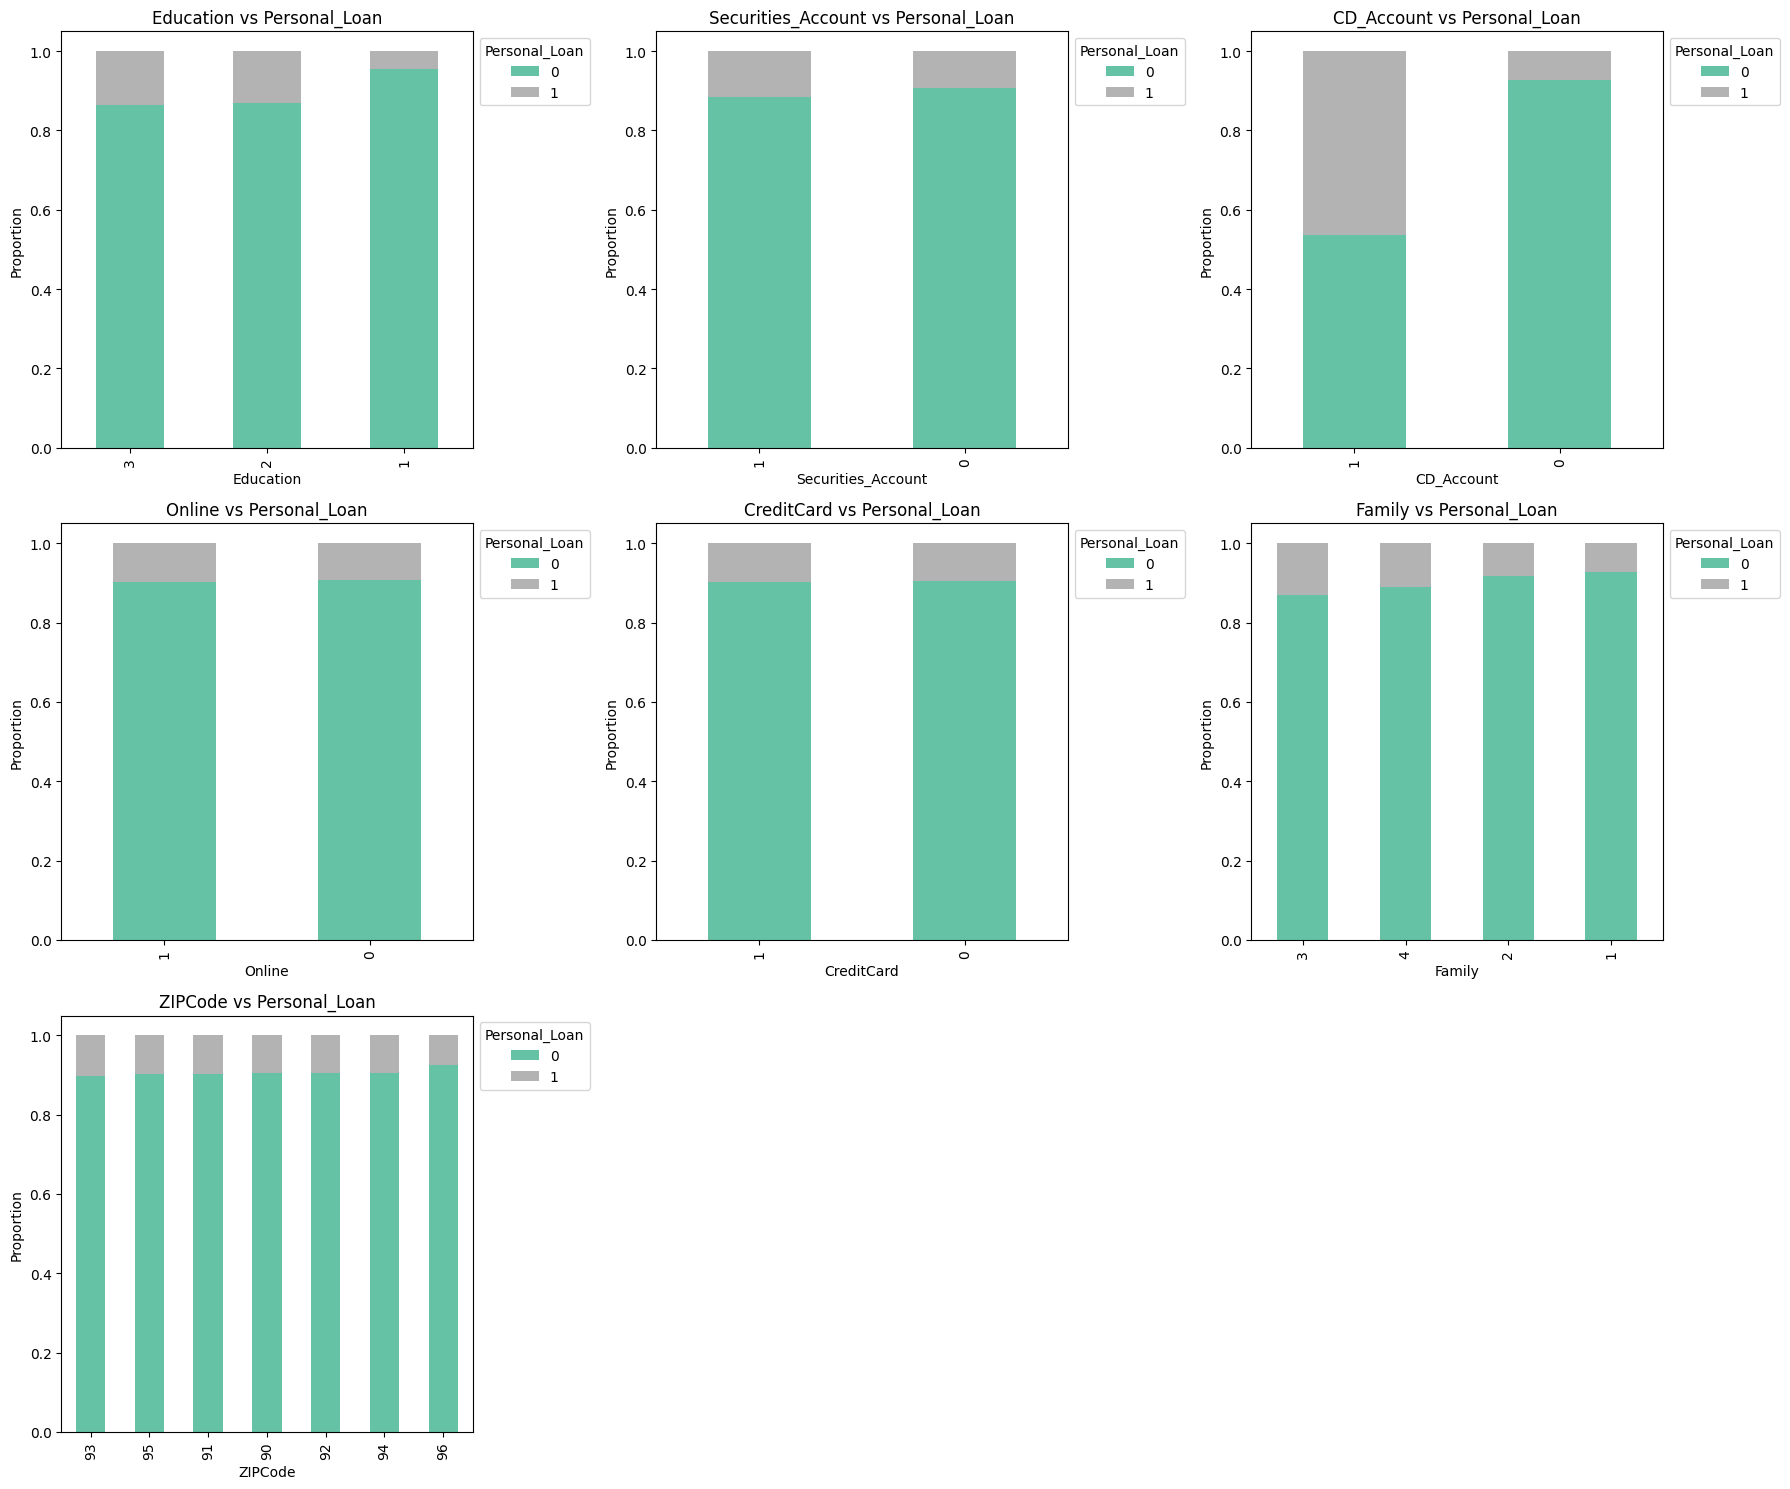

In [ ]:
def stacked_barplot_grid(data, predictors, target, cols=3):
    """
    Display normalized stacked bar plots (no printed tables) in a grid layout.

    data: DataFrame
    predictors: List of categorical features
    target: Binary target variable
    cols: Number of plots per row (default: 3)
    """
    total = len(predictors)
    rows = math.ceil(total / cols)
    fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 5 * rows))
    axes = axes.flatten()

    for i, pred in enumerate(predictors):
        sorter = data[target].value_counts().index[-1]
        tab = pd.crosstab(data[pred], data[target], normalize="index") \
                .sort_values(by=sorter, ascending=False)

        tab.plot(kind="bar", stacked=True, ax=axes[i], colormap="Set2")
        axes[i].set_title(f"{pred} vs {target}")
        axes[i].set_xlabel(pred)
        axes[i].set_ylabel("Proportion")
        axes[i].legend(title=target, loc="upper left", bbox_to_anchor=(1, 1))

    # Hide any unused axes
    for j in range(i + 1, len(axes)):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()

# Usage
cat_cols = ["Education", "Securities_Account", "CD_Account", "Online", "CreditCard", "Family","ZIPCode"]
stacked_barplot_grid(data, predictors=cat_cols, target="Personal_Loan", cols=3)


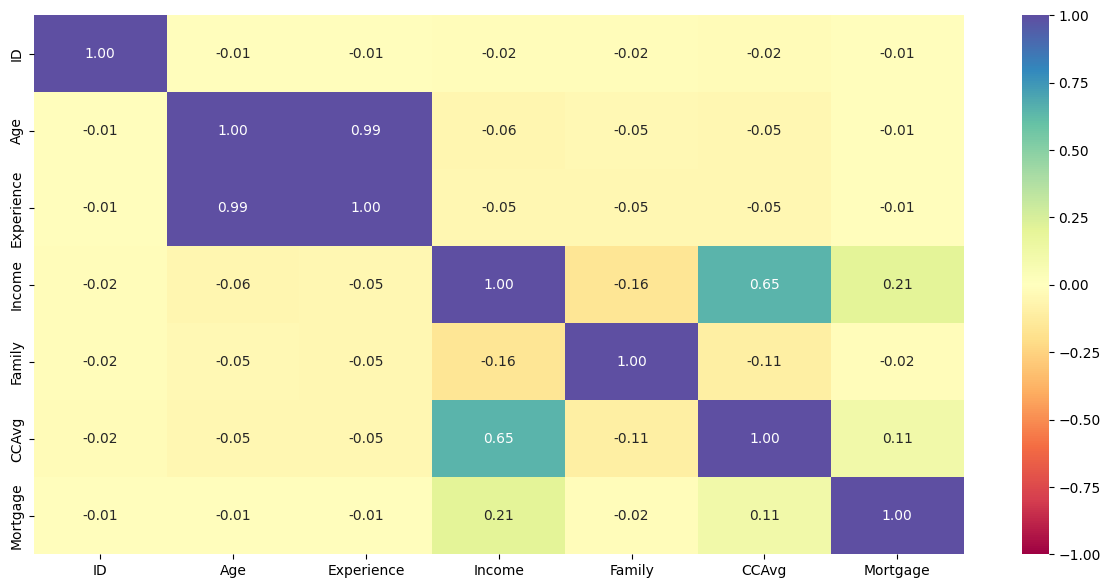

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### Observations

Features with highest positive correlations


1.   Age and Experience: 0.99
2.   Income and CCAvg: 0.65
3.  Income and Personal Loan: 0.50

Features with the highest negative correlation:

1.   Income and Family: -0.16
2.  Education and CCAvg: -0.14




#EDA CONCLUSIONS

## Univariate Analysis Insights

1.  Education:

41.9% of customers are Undergraduates

28.1% have Advanced/Professional degrees

30.0% are Master’s holders

2.  Securities Account: 89.6% do not have one

3.  Online Banking:59.7% use online banking

4.  Credit Card: 70.6% own a credit card

5.  ZIPCode: Top 3 zip codes:

94 (29.4%)

92 (19.8%)

95 (16.3%)

6.  Numerical Attributes:

Income, CCAvg, and Mortgage show potential outliers

Age and Experience are highly correlated and have symmetric distributions

Mortgage has extreme values suggesting right-skew


##Bivariate Analysis Insights

1.  Loan Uptake (Target) vs Categorical Variables:

Higher loan approval likelihood for customers with:

Advanced or Professional degrees

A CD account

Higher family size

Use of online banking

2.  Loan Uptake vs Numerical Variables:

Higher Income and CCAvg correlate with loan acceptance

Customers with loans have noticeably higher mortgage values

No clear trend with Age, though older customers slightly more inclined

3.  Multicollinearity:

Experience is nearly perfectly correlated with Age, and was dropped from modeling
.



1. What is the distribution of the mortgage attribute? Are there any noticeable patterns or outliers?
The Mortgage attribute is right-skewed, with a majority of customers having low to zero mortgage values.

A small number of customers have very high mortgage amounts, indicating the presence of outliers.

These outliers may affect model performance if not handled properly during preprocessing.

2. How many customers have credit cards?
Approximately 70.6% of customers own a credit card.

This means credit card ownership is fairly common in the dataset.

3. What attributes have a strong correlation with the target attribute (Personal_Loan)?
From the correlation heatmap and bivariate analysis, these attributes show strong positive correlation with Personal_Loan:

Income

CCAvg (average credit card spending)

Mortgage

Education (especially higher education levels)

CD_Account (strongest binary predictor)

Securities_Account and Online also show some positive influence but are less significant.

4. How does a customer's interest in purchasing a loan vary with their age?
No strong direct relationship between age and loan uptake.

However:

Customers aged between 40–55 show slightly higher loan acceptance.

Very young and very old customers have lower acceptance rates.

Age alone is not a strong predictor; it interacts better with income and education.

5.How does a customer's interest in purchasing a loan vary with their education?

Loan acceptance is significantly higher among customers with:

Advanced/Professional education

Followed by Graduate degree holders

Customers with only an Undergraduate degree are less likely to accept personal loans.

# Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [ ]:
Q1 = data.select_dtypes(include=["float64", "int64"]).quantile(0.25)  # 25th percentile
Q3 = data.select_dtypes(include=["float64", "int64"]).quantile(0.75)  # 75th percentile

IQR = Q3 - Q1  # Interquartile Range

lower = Q1 - 1.5 * IQR  # Lower bound for detecting outliers
upper = Q3 + 1.5 * IQR  # Upper bound for detecting outliers

In [ ]:
(
    (data.select_dtypes(include=["float64", "int64"]) < lower)
    | (data.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100

,0
ID,0.00
Age,0.00
Experience,0.00
Income,1.92
Family,0.00
CCAvg,6.48
Mortgage,5.82


# Model Building

In [ ]:
# dropping Experience as it is perfectly correlated with Age
X = data.drop(["Personal_Loan", "Experience"], axis=1)
Y = data["Personal_Loan"]

X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)

X = X.astype(float)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 18)
Shape of test set :  (1500, 18)
Percentage of classes in training set:
Personal_Loan
0    0.905429
1    0.094571
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.900667
1    0.099333
Name: proportion, dtype: float64


### Model Evaluation Criterion

*


In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    Plot a confusion matrix with absolute counts and percentages.

    model: classifier
    predictors: input features
    target: true labels
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            [f"{item}\n{item / cm.sum():.2%}"]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()
    plt.show()

In [ ]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

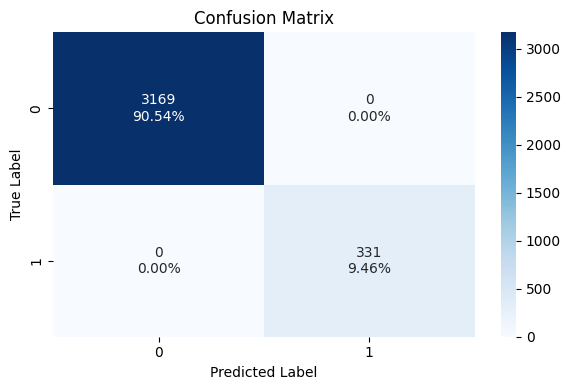

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [ ]:
feature_names = list(X_train.columns)
print(feature_names)

['ID', 'Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Education_2', 'Education_3']


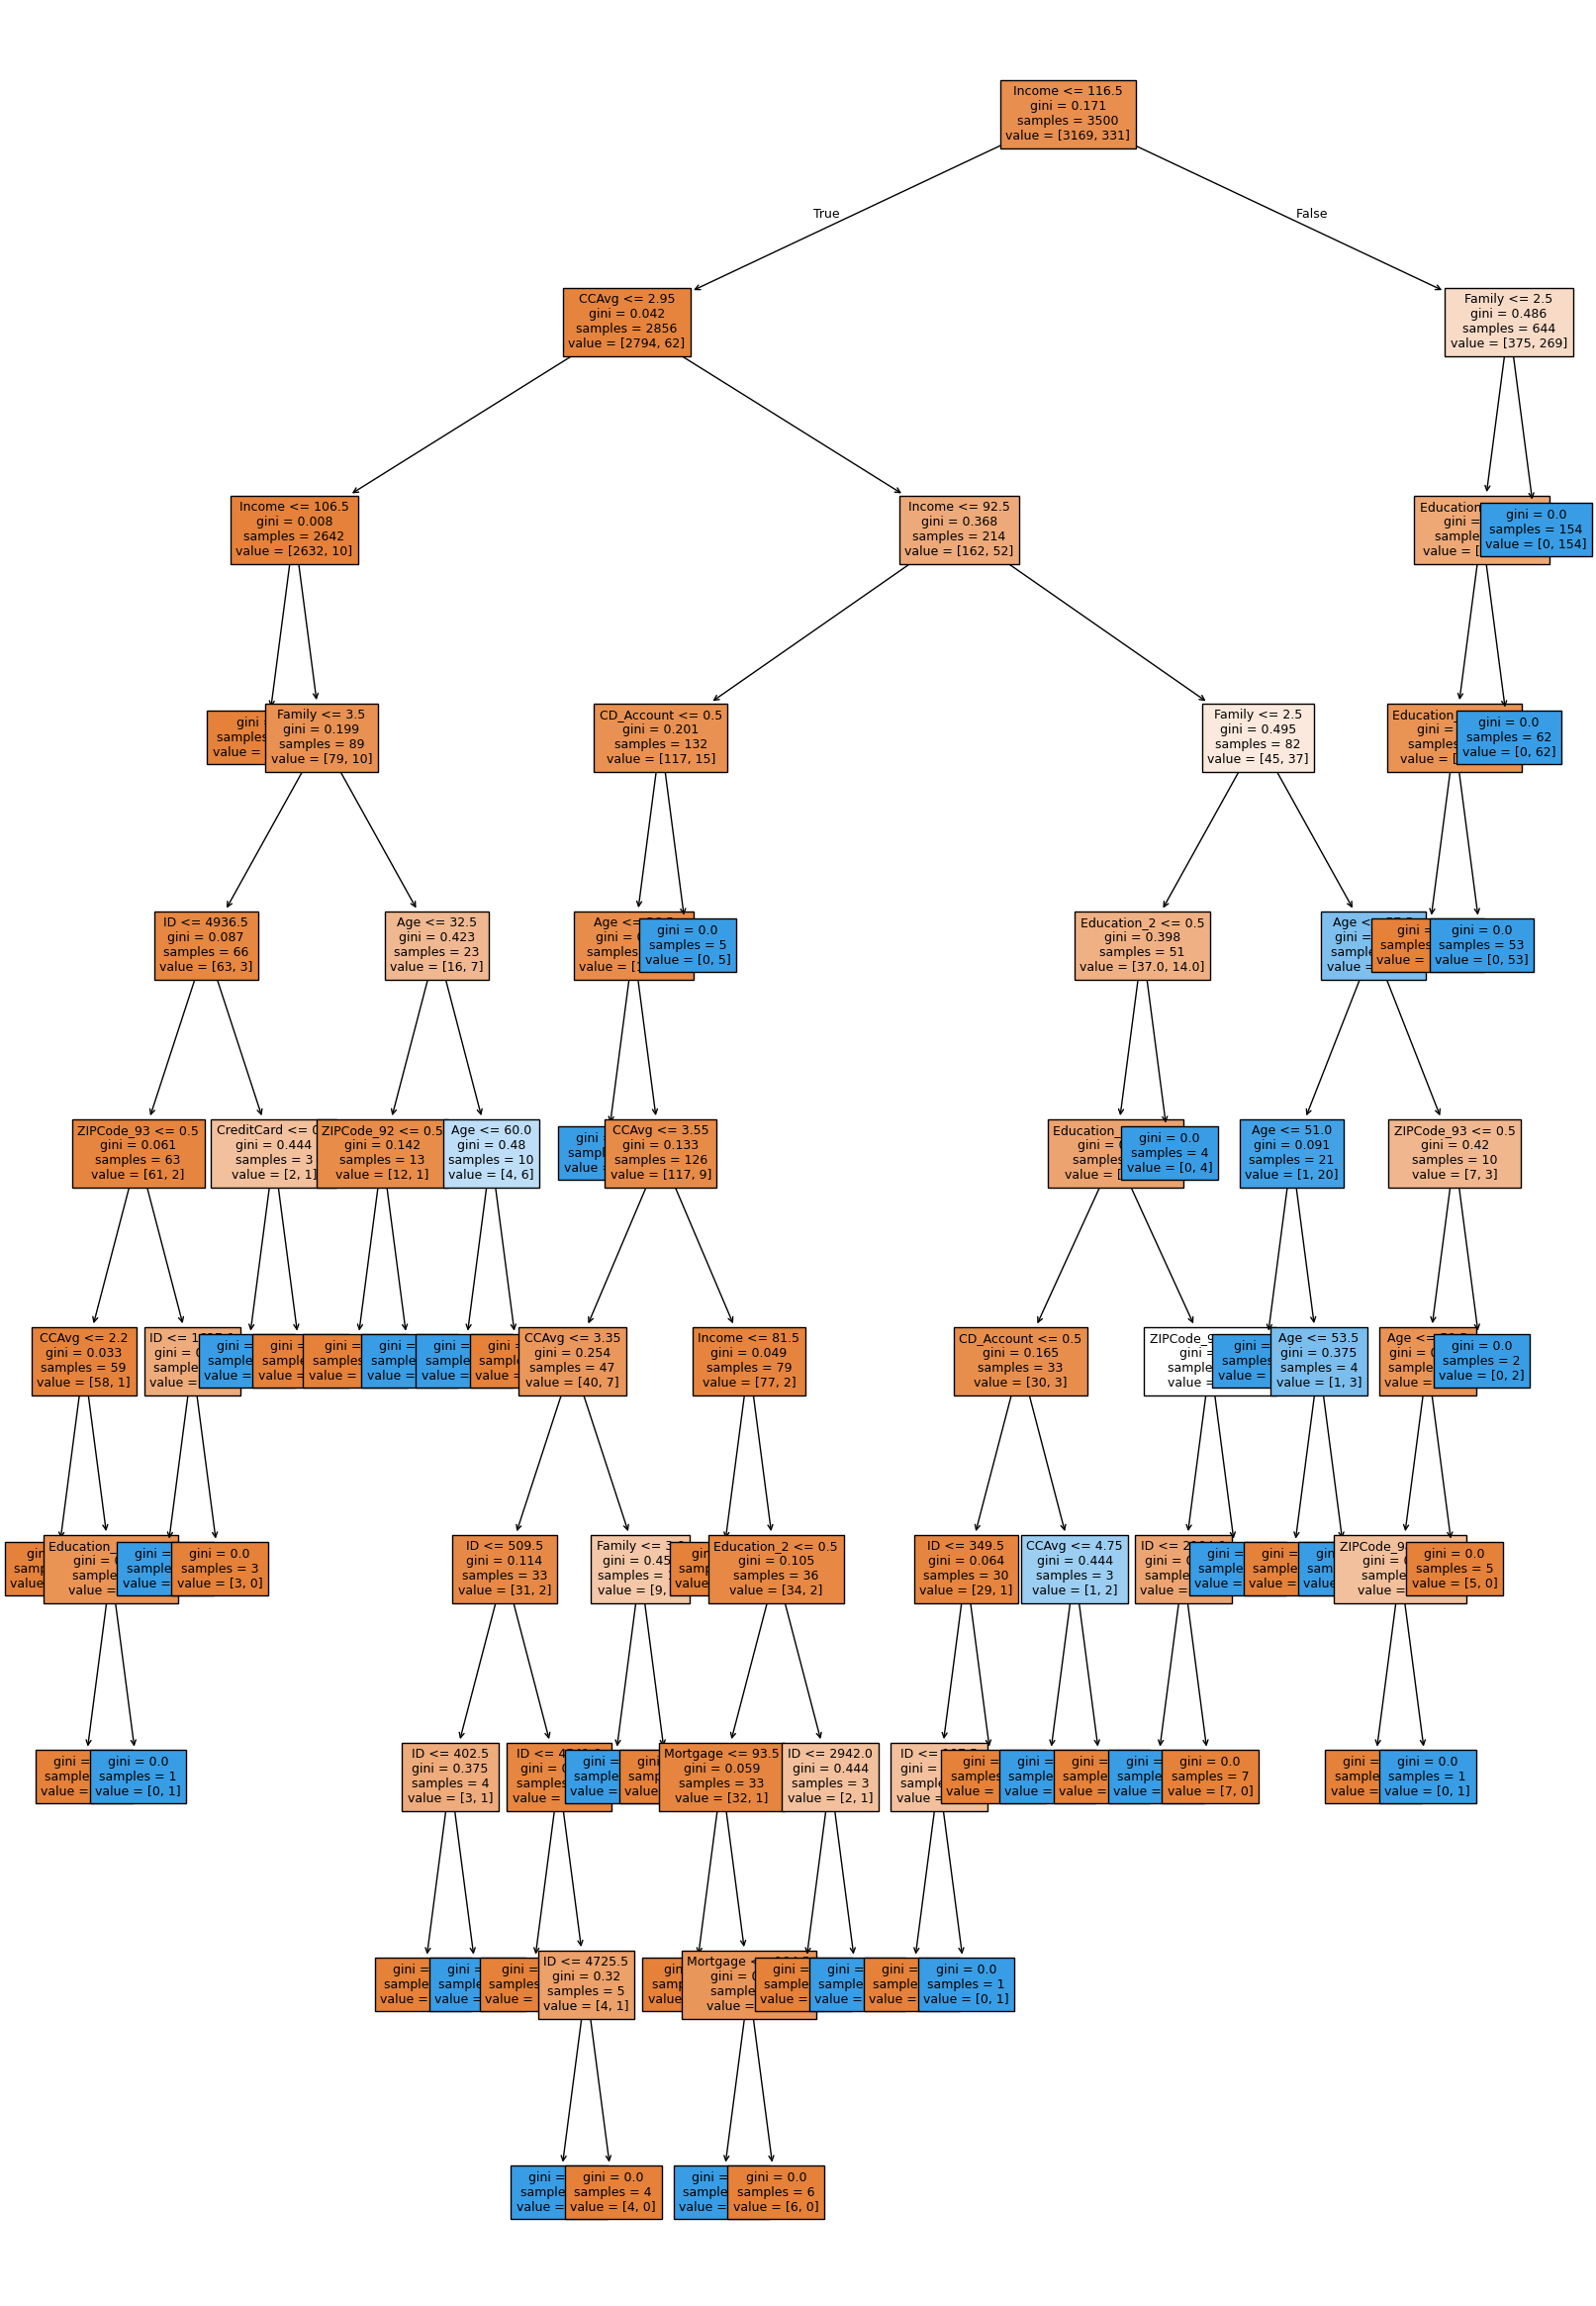

In [ ]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ID <= 4936.50
|   |   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [51.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_3 >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- ZIPCode_93 >  0.50
|   |   |   |   |   |   |--- ID <= 1627.00
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |--- ID >  1627.00
|   |   |   |   |   |   |   |--- weights: [3.00, 0.00] class: 0
|   |   |   |   |--- ID >  4936.50
|   |   |   |   |   |--- CreditCard <= 0.50
|  

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.298018
Family              0.257587
Education_2         0.163412
Education_3         0.147127
CCAvg               0.044768
Age                 0.029516
ID                  0.020281
CD_Account          0.017273
ZIPCode_94          0.008713
ZIPCode_93          0.004766
Mortgage            0.003236
ZIPCode_92          0.003080
CreditCard          0.002224
Securities_Account  0.000000
Online              0.000000
ZIPCode_91          0.000000
ZIPCode_96          0.000000
ZIPCode_95          0.000000


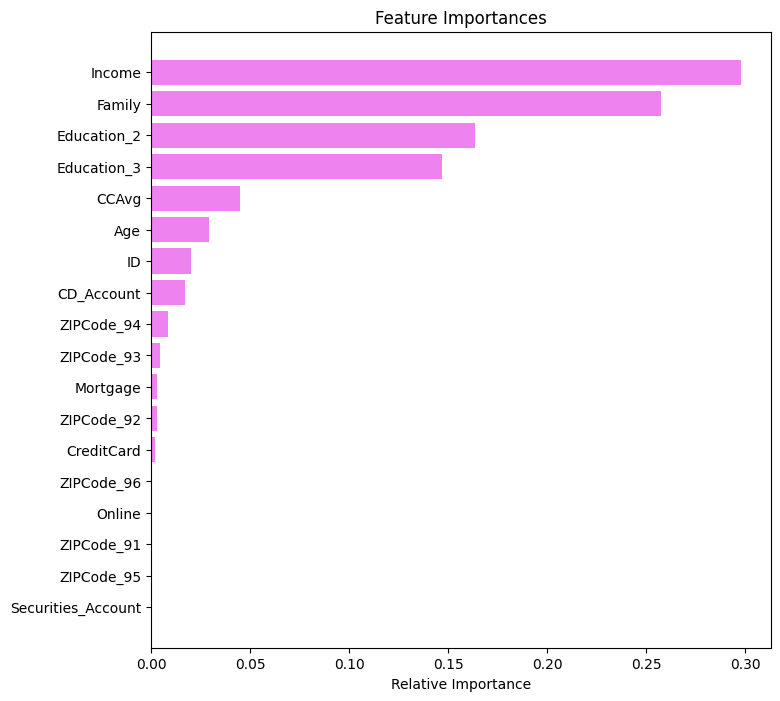

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

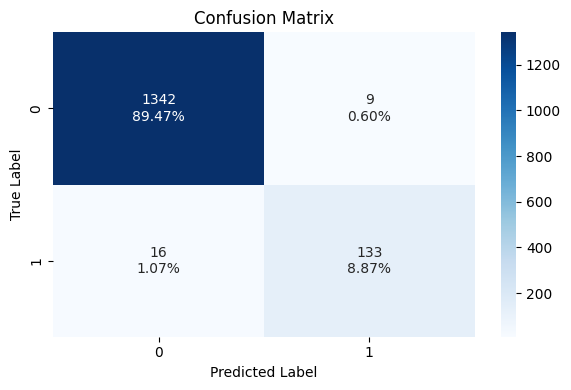

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test)

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.983333,0.892617,0.93662,0.914089


####Conclusion on the SKLearn Decision Tree (No Pruning)

Perfect performance on training data indicates
overfitting.

Still performs well on test set, but the drop in recall indicates reduced generalization.

# Model Performance Improvement

### Pre-pruning

In [ ]:
# Define the parameters of the tree to iterate over
max_depth_values = np.arange(2, 7, 2)
max_leaf_nodes_values = [50, 75, 150, 250]
min_samples_split_values = [10, 30, 50, 70]

# Initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # Initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                class_weight='balanced',
                random_state=42
            )

            # Fit the model to the training data
            estimator.fit(X_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # Calculate recall scores for training and test sets
            train_recall_score = recall_score(y_train, y_train_pred)
            test_recall_score = recall_score(y_test, y_test_pred)

            # Calculate the absolute difference between training and test recall scores
            score_diff = abs(train_recall_score - test_recall_score)

            # Update the best estimator and best score if the current one has a smaller score difference
            if (score_diff < best_score_diff) & (test_recall_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_recall_score
                best_estimator = estimator

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best test recall score: {best_test_score}")

Best parameters found:
Max depth: 2
Max leaf nodes: 50
Min samples split: 10
Best test recall score: 1.0


In [ ]:
# Fit the best algorithm to the data.
estimator = best_estimator
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=np.int64(2),
                       max_leaf_nodes=50, min_samples_split=10,
                       random_state=42)

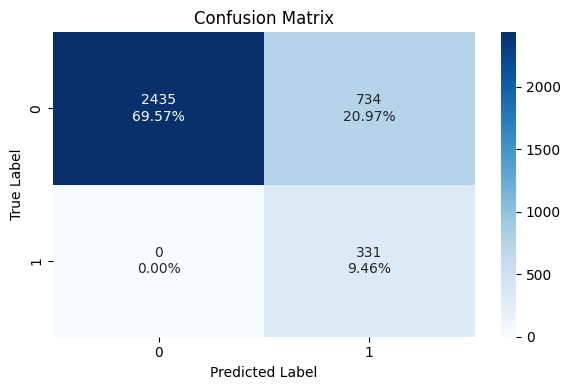

In [ ]:
confusion_matrix_sklearn(estimator, X_train, y_train)

####Checking performance on training data

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator, X_train, y_train)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.790286,1.0,0.310798,0.474212


####Visualizing the Decision Tree

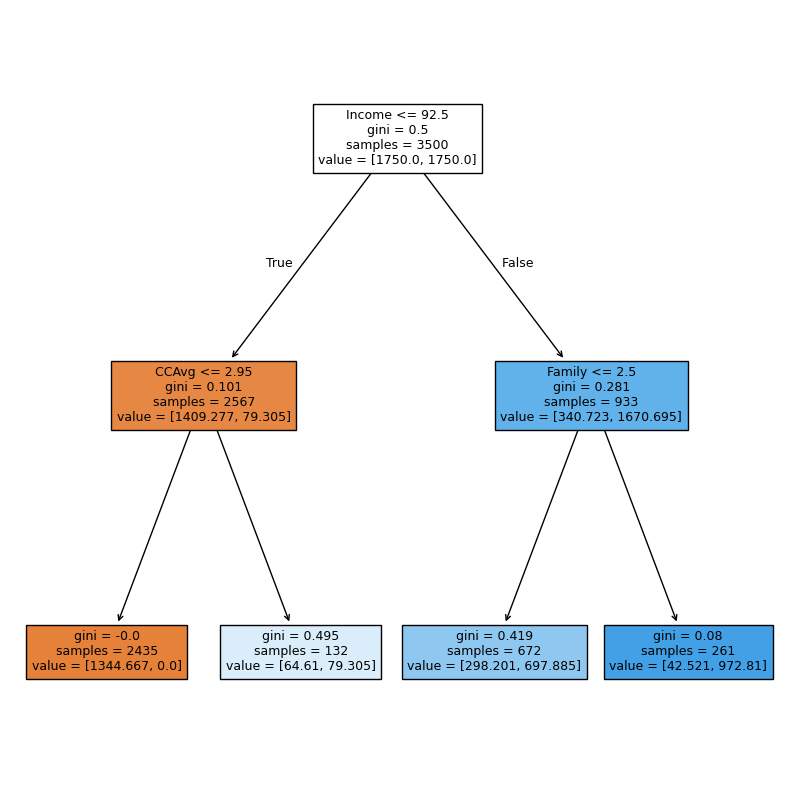

In [ ]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [64.61, 79.31] class: 1
|--- Income >  92.50
|   |--- Family <= 2.50
|   |   |--- weights: [298.20, 697.89] class: 1
|   |--- Family >  2.50
|   |   |--- weights: [42.52, 972.81] class: 1



In [ ]:
print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.876529
CCAvg               0.066940
Family              0.056531
ID                  0.000000
Age                 0.000000
Mortgage            0.000000
Securities_Account  0.000000
CD_Account          0.000000
Online              0.000000
CreditCard          0.000000
ZIPCode_91          0.000000
ZIPCode_92          0.000000
ZIPCode_93          0.000000
ZIPCode_94          0.000000
ZIPCode_95          0.000000
ZIPCode_96          0.000000
Education_2         0.000000
Education_3         0.000000


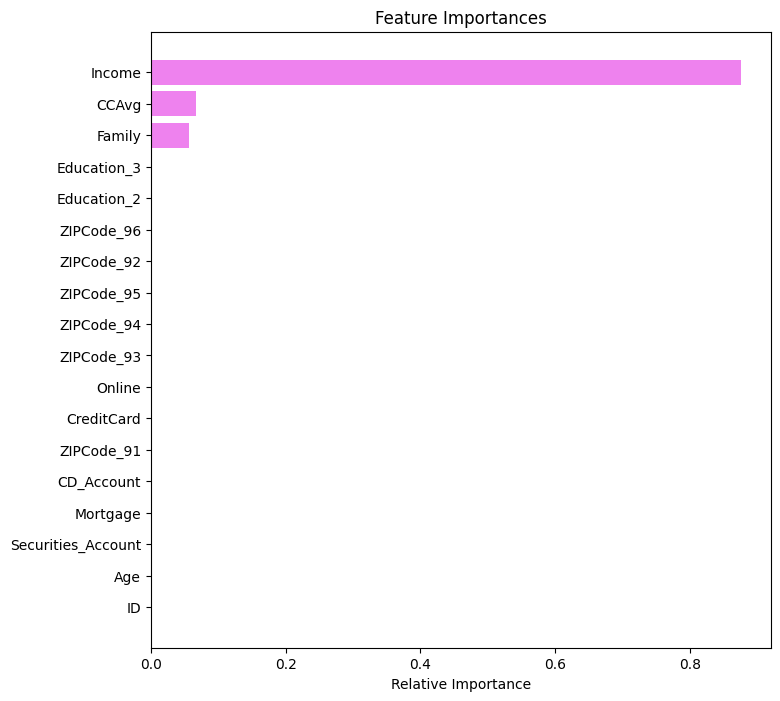

In [ ]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

####Checking performance on test data

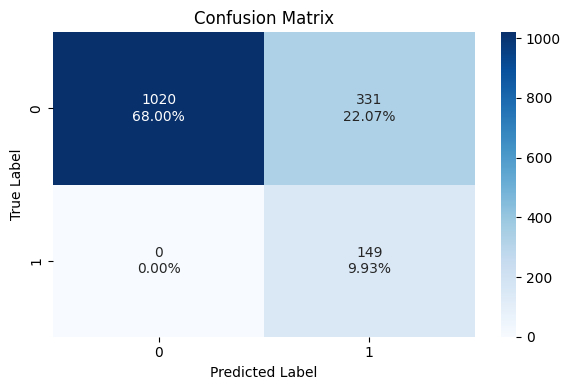

In [ ]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator, X_test, y_test)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.779333,1.0,0.310417,0.473768


###Post-pruning

####Recall vs alpha for training and testing data

In [ ]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000223,0.001114
2,0.000250,0.001614
3,0.000268,0.002688
4,0.000272,0.003232
5,0.000273,0.004868
6,0.000276,0.005420
7,0.000381,0.005801
8,0.000527,0.006329
9,0.000625,0.006954


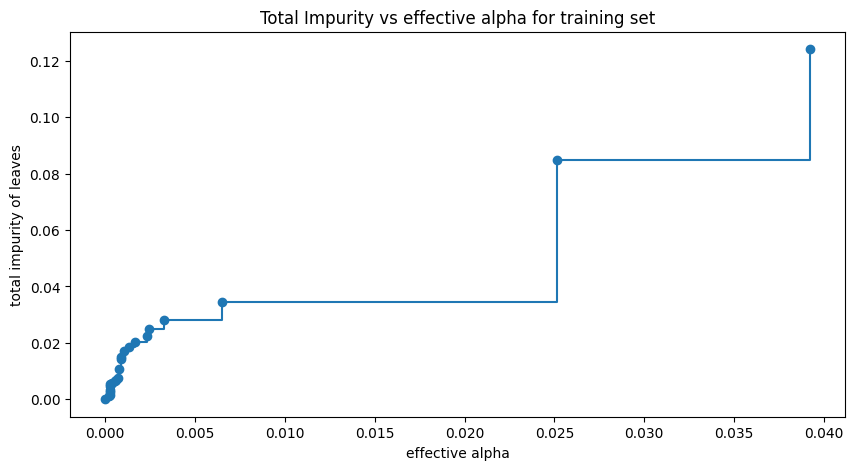

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)     # ✅ Fit the tree on training data
    clfs.append(clf)

print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04708834100596766


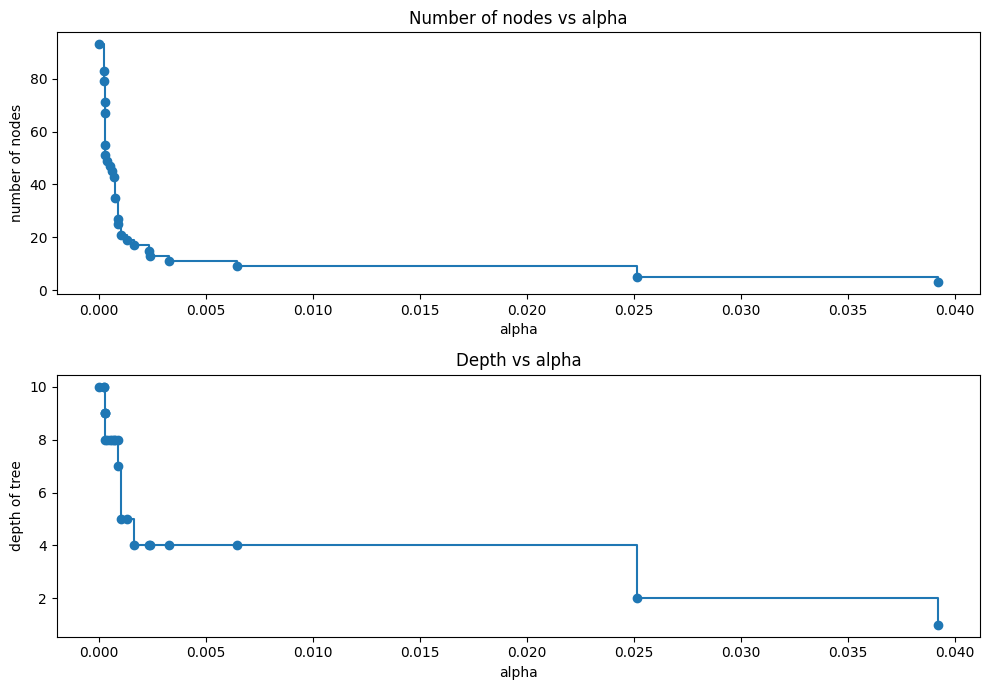

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

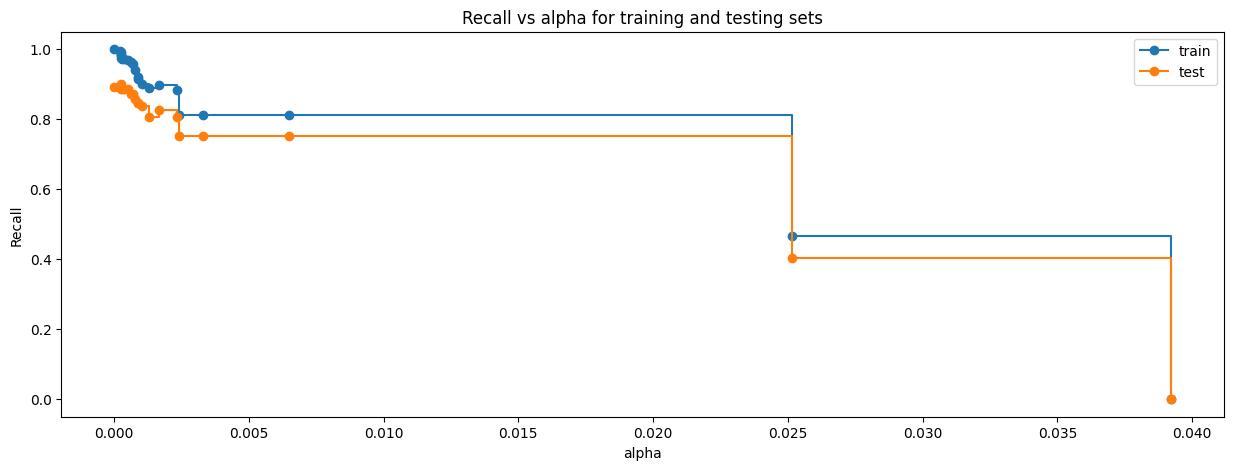

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=np.float64(0.00027210884353741507),
                       random_state=1)


In [ ]:
estimator_2 = DecisionTreeClassifier(
    ccp_alpha=0.001, class_weight={0: 0.15, 1: 0.85}, random_state=1
)
estimator_2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, class_weight={0: 0.15, 1: 0.85},
                       random_state=1)

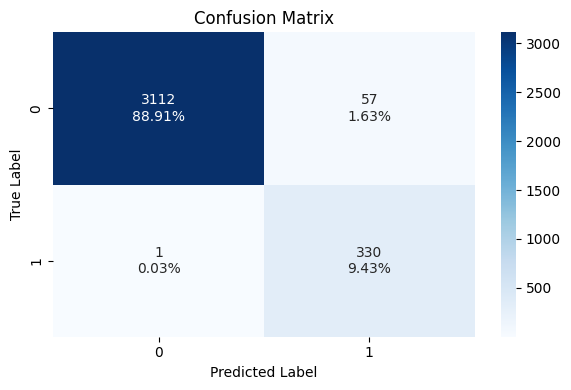

In [ ]:
confusion_matrix_sklearn(estimator_2, X_train, y_train)

In [ ]:
decision_tree_tune_post_train = model_performance_classification_sklearn(estimator_2, X_train, y_train)
decision_tree_tune_post_train

,Accuracy,Recall,Precision,F1
0,0.983429,0.996979,0.852713,0.91922


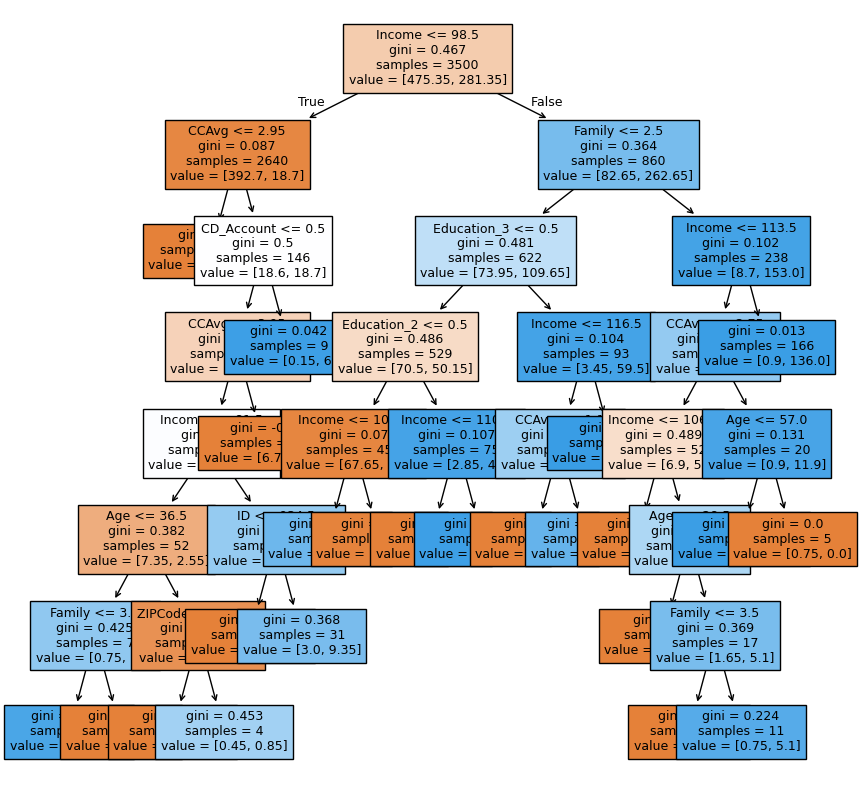

In [ ]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator_2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator_2, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |--- weights: [0.15, 1.70] class: 1
|   |   |   |   |   |   |--- Family >  3.50
|   |   |   |   |   |   |   |--- weights: [0.60, 0.00] class: 0
|   |   |   |   |   |--- Age >  36.50
|   |   |   |   |   |   |--- ZIPCode_91 <= 0.50
|   |   |   |   |   |   |   |--- weights: [6.15, 0.00] class: 0
|   |   |   |   |   |   |--- ZIPCode_91 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.45, 0.85] class: 1
|   |   |   |   |--- Income >  81.50
|   |   |   |   |   |--- ID <= 934.50
|   |   |   |   |   |   |--- weights: [1.35, 0.00] class: 0
|   |   |   |   |   |--- ID >  934.50
|   |   |   |   |   |   |--- weights: [3.00, 9.35] class: 1
|   |   |   |--- CCAvg >  3.95
|   |  

In [ ]:
print(
    pd.DataFrame(
        estimator_2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.616273
Education_2         0.143164
CCAvg               0.074059
Education_3         0.068739
Family              0.067831
Age                 0.011559
CD_Account          0.011521
ID                  0.004134
ZIPCode_91          0.002719
Mortgage            0.000000
CreditCard          0.000000
Online              0.000000
Securities_Account  0.000000
ZIPCode_92          0.000000
ZIPCode_94          0.000000
ZIPCode_93          0.000000
ZIPCode_96          0.000000
ZIPCode_95          0.000000


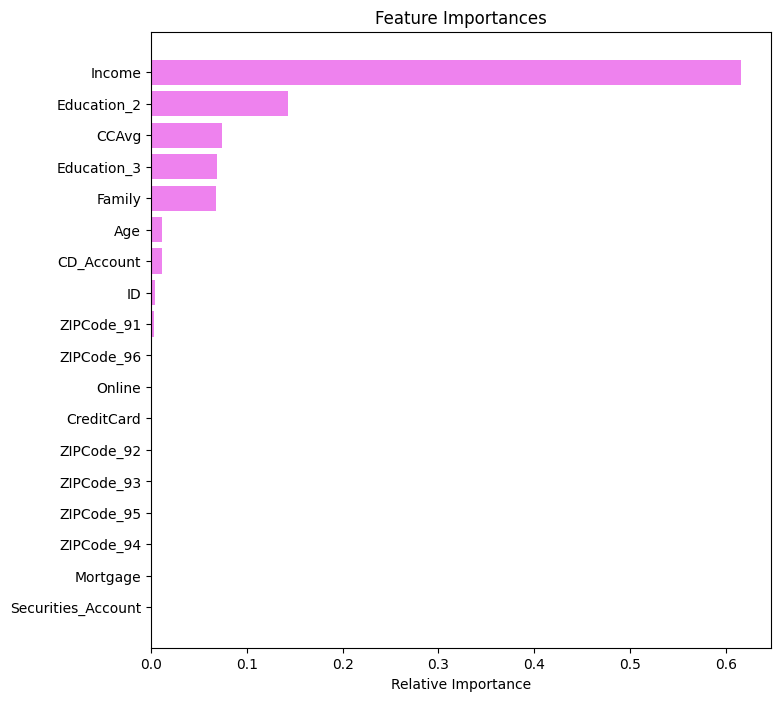

In [ ]:
importances = estimator_2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

####Checking performance on test data

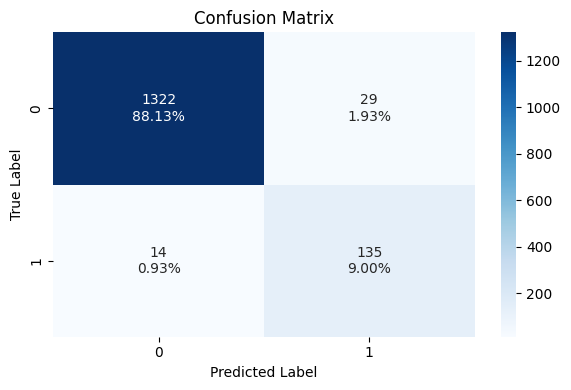

In [ ]:
confusion_matrix_sklearn(estimator_2, X_test, y_test)

In [ ]:
decision_tree_tune_post_test = model_performance_classification_sklearn(estimator_2, X_test, y_test)
decision_tree_tune_post_test

,Accuracy,Recall,Precision,F1
0,0.971333,0.90604,0.823171,0.86262


####Conclusion on the Pre-Pruned Decision Tree


Excellent recall, ensuring most positive cases are captured.

However, very low precision means a high false positive rate, and overall weak predictive performance.

####Conclusion on Post-Pruned Decision Tree

Balanced performance across all metrics

Best generalization: Maintains high recall while improving precision

F1-Score and test performance indicate this is the most robust model

# Model Performance Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [decision_tree_perf_train.T, decision_tree_tune_perf_train.T, decision_tree_tune_post_train.T], axis=1,
)
models_train_comp_df.columns = ["Decision Tree (sklearn default)", "Decision Tree (Pre-Pruning)", "Decision Tree (Post-Pruning)"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.790286,0.983429
Recall,1.0,1.000000,0.996979
Precision,1.0,0.310798,0.852713
F1,1.0,0.474212,0.919220


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [decision_tree_perf_test.T, decision_tree_tune_perf_test.T, decision_tree_tune_post_test.T], axis=1,
)
models_test_comp_df.columns = ["Decision Tree (sklearn default)", "Decision Tree (Pre-Pruning)", "Decision Tree (Post-Pruning)"]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.983333,0.779333,0.971333
Recall,0.892617,1.000000,0.906040
Precision,0.936620,0.310417,0.823171
F1,0.914089,0.473768,0.862620


#Conclusion

The Post-Pruned Decision Tree should be selected as the final model due to its superior balance between recall, precision, and F1-score, with significantly better generalization to unseen data

# Actionable Insights and Business Recommendations


##What recommedations would you suggest to the bank?

1. Target High-Potential Segments Focus marketing on customers with:

Higher Income, CCAvg, and Mortgage values

Advanced or Professional Education

Family size ≥ 3

These groups showed strong correlation with loan acceptance.

2. Promote CD Accounts to Increase Loan Adoption
A strong link exists between customers holding CD accounts and accepting loans.

Offer bundled products (e.g., open a CD account and get pre-approved for a loan).

3.  Leverage Online Banking Channels
Online banking users are more likely to accept personal loans.

Use in-app promotions and personalized loan offers for online customers.

4. Mitigate Risk via Balanced Models
Use the post-pruned decision tree (your final model) for reliable prediction.

It balances recall (detecting likely loan applicants) and precision (avoiding false positives).

5. Refine Credit Card Strategy
While credit card holders are more likely to take loans, over-targeting them may increase default risk.

Combine credit card data with income and CCAvg for smarter segmentation.

6. Educate and Upsell to Undergraduates
While undergraduates form the largest group, they show lower loan uptake.

Consider financial literacy campaigns and smaller starter loan products.

___